In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('BostonHousing.csv')
df.head()

In [2]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [11]:
df.dropna(inplace=True)

X, y = df.iloc[:, :-1].values, df.iloc[:,-1].values
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_s = StandardScaler().fit_transform(X_train)
X_test_s = StandardScaler().fit_transform(X_train)

In [12]:
nn_params = {'in_features': X.shape[1], 'h1': 16, 'h2': 8, 'out': 1}

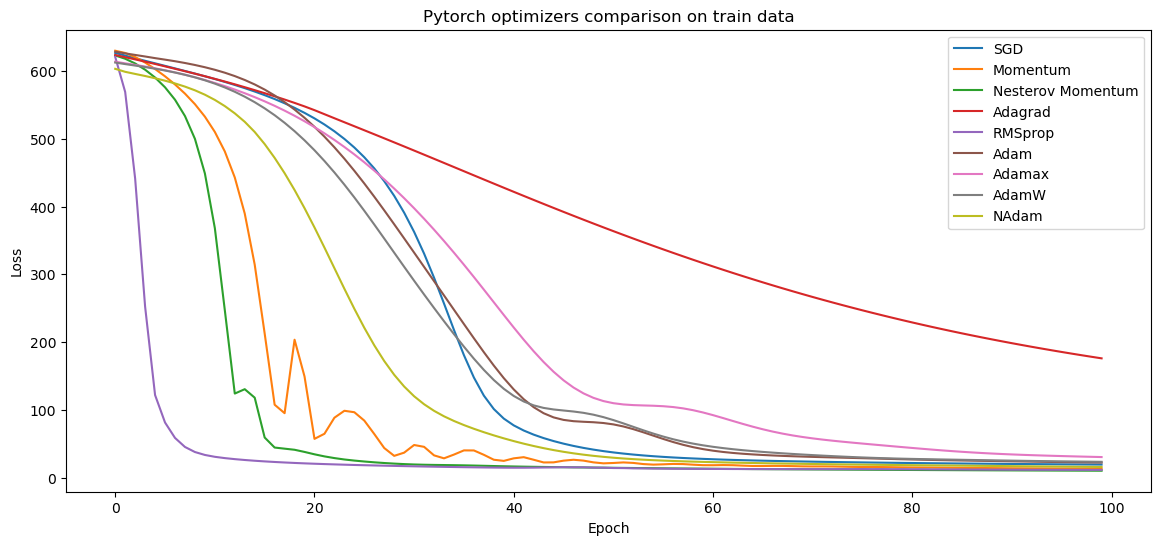

In [13]:
from torch import nn, optim, FloatTensor, relu, manual_seed


class TorchNN(nn.Module):
    def __init__(self, in_features, h1, h2, out):
        super(TorchNN, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, out)
    def forward(self, x):
        x = relu(self.fc1(x))
        x = relu(self.fc2(x))
        x = self.fc3(x)

        return x


def torch_losses(data, model, optim_cls, optim_params, num_epochs=100):
    losses = []
    X_train, y_train = data
    criterion = nn.MSELoss()
    optimizer = optim_cls(model.parameters(), **optim_params)

    for epoch in range(num_epochs):
        y_pred = model.forward(X_train)
        loss = criterion(y_pred, y_train)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return losses

manual_seed(0)
X_train_s_tensor = FloatTensor(X_train_s)
y_train_tensor = FloatTensor(y_train).view(-1, 1)

torch_optimizers = [
    (optim.SGD, 'SGD', {'lr': 0.001}),
    (optim.SGD, 'Momentum', {'lr': 0.001, 'momentum': 0.9}),
    (optim.SGD, 'Nesterov Momentum', {'lr': 0.001, 'momentum': 0.9, 'nesterov': True}),
    (optim.Adagrad, 'Adagrad', {'lr': 0.01}),
    (optim.RMSprop, 'RMSprop', {'lr': 0.01}),
    (optim.Adam, 'Adam', {'lr': 0.01}),
    (optim.Adamax, 'Adamax', {'lr': 0.01}),
    (optim.AdamW, 'AdamW', {'lr': 0.01}),
    (optim.NAdam, 'NAdam', {'lr': 0.01})
    ]

# Visualization
plt.figure(figsize=(14, 6))

for optim_cls, optim_name, optim_params in torch_optimizers:
    nn_model = TorchNN(**nn_params)
    t_losses = torch_losses((X_train_s_tensor, y_train_tensor), nn_model, optim_cls, optim_params)
    plt.plot(range(len(t_losses)), t_losses, label=f'{optim_name}')

plt.title('Pytorch optimizers comparison on train data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()